In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pydot
import tqdm
from datetime import datetime

from matplotlib import image as mpimg
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import yaml
import torch
from pathlib import Path

import ultralytics
from ultralytics import YOLO

In [4]:
# Load YOLOv8 model
model_path = "D:/Skripsi/Results/11-24-2023-100epchs-nopre/weights/best.pt" #change the model pt here
model = YOLO(model_path)

# Load YAML
args_path = "D:/Skripsi/Results/9-21-2023-100epch-unfinished/args.yaml" #change the args here
with open(args_path, 'r') as f:
    config = yaml.safe_load(f)

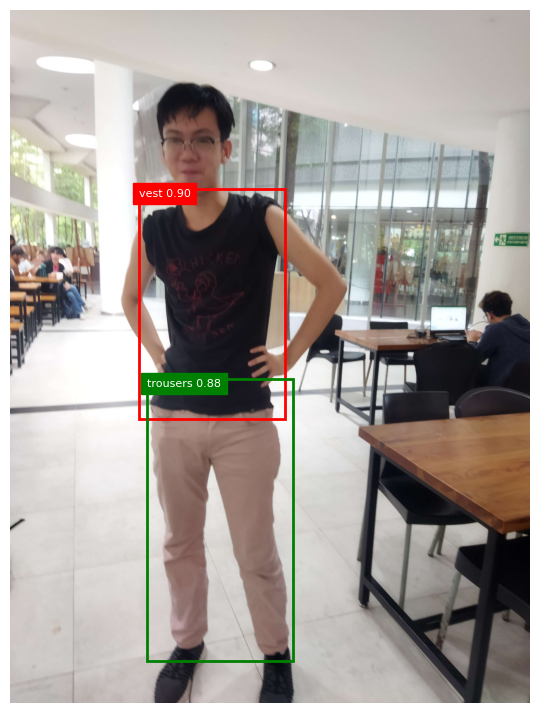

In [23]:
pred_path = "D:/Skripsi/Testing/pic/c3.jpg"
image = cv2.imread(pred_path)
if image is None:
    print("Error: Could not load image.")
    exit()

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ok = {1, 2, 3, 4, 8, 9, 10, 11}

results = model.predict(image, verbose=False)
boxes_data = results[0].boxes.data
boxes_data_np = boxes_data.cpu().numpy()

fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(rgb)

if boxes_data_np is not None:
    for box_data in boxes_data_np:
        x1, y1, x2, y2, conf, cls = box_data
        label = f"{results[0].names[int(cls)]} {conf:.2f}"
        box_color = 'green' if cls in ok else 'red'

        # Draw rectangles and text
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=box_color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1, label, verticalalignment='top', color='white', fontsize=8, backgroundcolor=box_color)

plt.axis('off')
plt.show()